In [1]:
import os

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from trackml.dataset import load_event, load_dataset
from trackml.score import score_event

import operator
event_prefix = 'event000001001'
hits, cells, particles, truth = load_event(os.path.join('train_100_events/', event_prefix))



#######All new pd.dataframe goes here
hits_playground = hits[["x","y","z"]]
hits_playground["r"] =np.sqrt(hits_playground["x"]**2 + hits_playground["y"]**2 + hits_playground["z"]**2)
hits_playground["phi"] = np.degrees(np.arctan2(hits_playground["y"], hits_playground["x"]))
hits_playground["theta"] = np.degrees(np.arccos(hits_playground["z"]/hits_playground["r"]))

# real_particles 
real_particles = particles[particles["particle_id"] != 0]
particles_count = real_particles.shape[0]
neutral_particles = particles[particles["q"] == 0]
hits_playground["r"].ix[particles_count]
no_hits_particles = particles[particles["nhits"] == 0]
new_truth = truth
new_truth['Energy'] = np.sqrt(truth['tpx']**2 + truth['tpy']**2 + truth['tpz']**2)

#new_truth

real_particles['Energy'] = np.sqrt(real_particles['px']**2 + real_particles['py']**2 + real_particles['pz']**2)



real_particles.sort_values("Energy")

/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

,particle_id,vx,vy,vz,px,py,pz,q,nhits,Energy
4441,450361680723968000,-0.007040,0.019831,-7.752930,0.046854,-0.088817,0.006568,1,0,0.100633
283,9017919493111808,0.008523,0.015736,2.003140,-0.089807,-0.045862,-0.003257,1,0,0.100892
5772,607997838181277698,-227.115997,-782.283020,-374.623993,0.074490,0.069092,0.005811,1,0,0.101765
3059,301742961756999681,-204.222000,788.570007,-27.283701,-0.044898,0.091218,0.011366,1,0,0.102302
477,22521159266340865,348.584015,90.839203,577.575989,0.100198,0.004256,0.025606,-1,0,0.103506
1952,193665641671041026,329.954010,-796.125977,1497.500000,0.032115,0.096764,0.018364,1,0,0.103595
5806,608006428115890178,244.783005,72.842300,283.769012,-0.041919,0.092346,-0.023891,1,0,0.104192
6370,666539685517983744,10.510700,44.816101,-94.565002,0.042229,0.093371,-0.020310,-1,1,0.104470
5672,603519321162915842,47.862900,57.695801,-127.100998,-0.040988,-0.093827,-0.021543,1,0,0.104631
1741,184659679383670786,24.414600,-583.882019,-1500.000000,-0.095327,0.044505,-0.004777,1,1,0.105313


In [2]:
truth_playground = truth
truth_playground["r"] =np.sqrt(truth_playground["tx"]**2 + truth_playground["ty"]**2 + truth_playground["tz"]**2)
truth_playground["phi"] = np.degrees(np.arctan2(truth_playground["ty"], truth_playground["tx"]))
truth_playground["theta"] = np.degrees(np.arccos(truth_playground["tz"]/truth_playground["r"]))
truth_playground['Energy'] = np.sqrt(truth['tpx']**2 + truth['tpy']**2 + truth['tpz']**2)

truth_playground

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,Energy,r,phi,theta
0,1,324262265547128832,-69.290901,-0.794919,-1502.5,-0.511341,0.019336,-11.069000,0.000009,1.108082e+01,1504.097046,-179.342712,177.359436
1,2,45044036452483072,-73.306801,-8.292610,-1502.5,-0.304958,-0.054226,-6.365820,0.000009,6.373351e+00,1504.310181,-173.546021,177.188873
2,3,99080634911162368,-63.819698,-5.603060,-1502.5,-0.195871,-0.036081,-4.654030,0.000011,4.658289e+00,1503.865234,-174.982559,177.558395
3,4,360288863542837248,-72.108704,-9.734450,-1502.5,-0.471937,-0.090322,-9.950480,0.000009,9.962075e+00,1504.260864,-172.311722,177.227448
4,5,175642928088088576,-93.505600,-0.688461,-1502.5,-0.684687,0.025229,-10.986000,0.000011,1.100734e+01,1505.406982,-179.578140,176.438766
5,6,607988217437749248,-94.062500,-0.140013,-1502.5,-0.751325,-0.025789,-12.135300,0.000012,1.215856e+01,1505.441406,-179.914703,176.417770
6,7,301746122836148224,-84.052597,-14.139700,-1502.5,-1.064840,-0.153445,-19.016001,0.000017,1.904641e+01,1504.915649,-170.450851,176.753189
7,8,175642790649135104,-71.731499,-0.651773,-1502.5,-0.230322,-0.017360,-4.940120,0.000009,4.945517e+00,1504.211426,-179.479401,177.266617
8,9,423339945520791552,-69.304298,-0.849361,-1502.5,-1.694400,0.002276,-36.858601,0.000028,3.689753e+01,1504.097778,-179.297836,177.358826
9,10,112593495377575936,-57.617599,-5.953970,-1502.5,-0.398745,-0.029849,-10.357200,0.000010,1.036492e+01,1503.616089,-174.100220,177.792282


In [3]:

truth_hits_in_cone = truth_playground[(truth_playground["theta"].between(2.55, 3.56, inclusive=True)) & (truth_playground["phi"].between(110., 111.56, inclusive=False))] #& hits_playground["theta"]>179]
truth_hits_in_cone

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,Energy,r,phi,theta
37611,37612,621504101561139200,-11.321400,29.647400,597.5,-0.373032,0.950068,19.366800,0.000026,19.393679,598.342224,110.900261,3.040407
37664,37665,621504101561139200,-11.418200,29.892799,602.5,-0.376665,0.950489,19.366100,0.000020,19.393070,603.349182,110.905426,3.040214
37740,37741,621504101561139200,-11.331100,29.671900,598.0,-0.373415,0.949917,19.366699,0.000023,19.393576,598.842896,110.900841,3.040343
39756,39757,621504101561139200,-13.271900,34.552101,697.5,-0.379169,0.949025,19.365999,0.000017,19.392946,698.481384,111.012413,3.037573
39804,39805,621504101561139200,-13.369700,34.797100,702.5,-0.378420,0.949389,19.365499,0.000013,19.392450,703.488342,111.017708,3.037509
39890,39891,621504101561139200,-13.281700,34.576599,698.0,-0.378938,0.948886,19.365999,0.000015,19.392935,698.982056,111.012970,3.037573
41897,41898,621504101561139200,-15.625300,40.429798,817.5,-0.381111,0.948395,19.365499,0.000011,19.392454,818.648254,111.130508,3.034994
41941,41942,621504101561139200,-15.723000,40.674599,822.5,-0.376437,0.947256,19.364901,0.000008,19.391708,823.655212,111.134285,3.034930
42004,42005,621504101561139200,-15.635100,40.454300,818.0,-0.380149,0.948704,19.365299,0.000008,19.392250,819.148926,111.130913,3.034930
43686,43687,621504101561139200,-18.358200,47.271099,957.5,-0.379343,0.945301,19.364901,0.000008,19.391670,958.841919,111.224167,3.031638


In [4]:
truth_playground[truth_playground["particle_id"] == 621504101561139200]

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,Energy,r,phi,theta
37611,37612,621504101561139200,-11.321400,29.647400,597.5,-0.373032,0.950068,19.366800,0.000026,19.393679,598.342224,110.900261,3.040407
37664,37665,621504101561139200,-11.418200,29.892799,602.5,-0.376665,0.950489,19.366100,0.000020,19.393070,603.349182,110.905426,3.040214
37740,37741,621504101561139200,-11.331100,29.671900,598.0,-0.373415,0.949917,19.366699,0.000023,19.393576,598.842896,110.900841,3.040343
39756,39757,621504101561139200,-13.271900,34.552101,697.5,-0.379169,0.949025,19.365999,0.000017,19.392946,698.481384,111.012413,3.037573
39804,39805,621504101561139200,-13.369700,34.797100,702.5,-0.378420,0.949389,19.365499,0.000013,19.392450,703.488342,111.017708,3.037509
39890,39891,621504101561139200,-13.281700,34.576599,698.0,-0.378938,0.948886,19.365999,0.000015,19.392935,698.982056,111.012970,3.037573
41897,41898,621504101561139200,-15.625300,40.429798,817.5,-0.381111,0.948395,19.365499,0.000011,19.392454,818.648254,111.130508,3.034994
41941,41942,621504101561139200,-15.723000,40.674599,822.5,-0.376437,0.947256,19.364901,0.000008,19.391708,823.655212,111.134285,3.034930
42004,42005,621504101561139200,-15.635100,40.454300,818.0,-0.380149,0.948704,19.365299,0.000008,19.392250,819.148926,111.130913,3.034930
43686,43687,621504101561139200,-18.358200,47.271099,957.5,-0.379343,0.945301,19.364901,0.000008,19.391670,958.841919,111.224167,3.031638


In [5]:
def cart2spherical(cart):
    r = np.linalg.norm(cart, axis=0)
    theta = np.degrees(np.arccos(cart[2] / r))
    phi = np.degrees(np.arctan2(cart[1], cart[0]))
    return np.vstack((r, theta, phi))

In [6]:
#truth["hit_id"] == 37637
#truth.loc[[37637]]
 #= 770116567072505856 
truth_particle_770116567072505856 = truth[truth["particle_id"] == 770116567072505856]
truth_particle_770116567072505856

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,Energy,r,phi,theta
37595,37596,770116567072505856,-16.212799,44.702000,597.5,-0.592985,1.59486,21.319700,0.000061,21.387493,599.389160,109.935005,4.550231
37637,37638,770116567072505856,-16.351900,45.076099,602.5,-0.593059,1.59451,21.311899,0.000050,21.379692,604.405090,109.938850,4.550360
39782,39783,770116567072505856,-19.004101,52.179699,697.5,-0.597596,1.59291,21.311800,0.000039,21.379601,699.707153,110.011864,4.552082
39821,39822,770116567072505856,-19.144300,52.553501,702.5,-0.597566,1.59470,21.311199,0.000032,21.379133,704.723083,110.015770,4.552210
41896,41897,770116567072505856,-22.381001,61.152802,817.5,-0.601723,1.59282,21.311100,0.000024,21.379011,820.089539,110.101860,4.554404
41939,41940,770116567072505856,-22.521999,61.526402,822.5,-0.599757,1.59152,21.310699,0.000018,21.378460,825.105469,110.105362,4.554490
43742,43743,770116567072505856,-26.479200,71.972702,962.5,-0.604797,1.59012,21.309799,0.000018,21.377600,965.550354,110.198875,4.555522
45311,45312,770116567072505856,-30.468599,82.410004,1102.5,-0.609805,1.58699,21.309401,0.000021,21.377113,1105.995483,110.290337,4.556468
47801,47802,770116567072505856,-42.004601,112.109001,1502.0,-0.621825,1.58099,21.308201,0.000036,21.375818,1506.763672,110.539780,4.557242
47806,47807,770116567072505856,-41.888199,111.811996,1498.0,-0.619550,1.58093,21.309099,0.000031,21.376644,1502.750977,110.537483,4.557199


In [7]:
#truth.loc[truth["hit_id"] == 45276]
truth_particle_49553545954852864 = truth[truth["particle_id"] == 49553545954852864]
truth_particle_49553545954852864


,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,Energy,r,phi,theta
37472,37473,49553545954852864,-4.34040,30.812799,598.0,-0.209823,1.42513,27.784100,0.000030,27.821417,598.809082,98.018127,2.978810
37540,37541,49553545954852864,-4.37057,31.018000,602.0,-0.208577,1.42578,27.783400,0.000026,27.820742,602.814392,98.020416,2.978612
37592,37593,49553545954852864,-4.33664,30.787100,597.5,-0.208951,1.42498,27.784100,0.000033,27.821402,598.308350,98.017868,2.978678
39643,39644,49553545954852864,-5.09572,35.943199,698.0,-0.211104,1.42437,27.783400,0.000020,27.820688,698.943420,98.069130,2.977298
39716,39717,49553545954852864,-5.12597,36.148201,702.0,-0.209397,1.42314,27.783001,0.000018,27.820213,702.948792,98.070969,2.977232
39783,39784,49553545954852864,-5.09192,35.917599,697.5,-0.211094,1.42447,27.783400,0.000023,27.820694,698.442749,98.068863,2.977298
41809,41810,49553545954852864,-6.03719,42.292999,822.0,-0.214236,1.42278,27.782000,0.000012,27.819231,823.109436,98.123901,2.975127
41891,41892,49553545954852864,-6.00267,42.062500,817.5,-0.211821,1.42218,27.782900,0.000015,27.820082,818.603394,98.121742,2.975193
43649,43650,49553545954852864,-7.12538,49.459599,962.0,-0.216794,1.42229,27.781401,0.000010,27.818628,963.296936,98.197891,2.973482
43695,43696,49553545954852864,-7.09011,49.229401,957.5,-0.217832,1.42145,27.781900,0.000010,27.819094,958.790955,98.195488,2.973614


p_traj_list
 [               tx          ty          tz
16413   29.173700  -13.022100  -40.652699
16599   31.198999  -13.937600  -43.221901
22410   64.907799  -29.369499  -86.122002
27954  105.287003  -48.419201 -137.794998
32510  155.820999  -73.195900 -202.972000
56036  230.951004 -111.974998 -300.920990
61100  324.881012 -163.811996 -425.269989
65816  445.898987 -236.231995 -588.664001
65820  440.878998 -233.093002 -581.802979
70291  578.581970 -323.601013 -772.677002
70469  576.135986 -321.910004 -769.239990
83086  707.012024 -416.825989 -956.177979,                 tx          ty          tz
15845   -33.278599   -1.577450  -27.408400
17338   -32.070702   -1.514930  -26.649099
22730   -72.699097   -3.798890  -52.192402
27751  -115.607002   -6.651010  -79.134102
32709  -170.869995  -10.978000 -113.806999
56187  -260.635986  -19.714899 -170.307999
61550  -362.032990  -31.968000 -234.302994
66438  -494.619995  -51.667702 -318.546997
71052  -659.906982  -82.337799 -424.384003
71054  -6

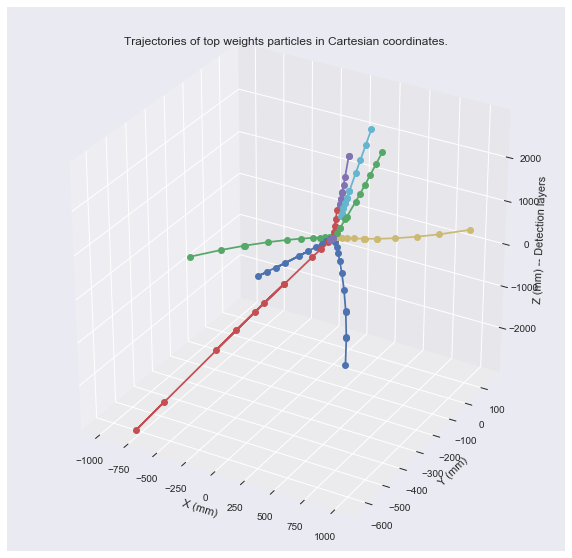

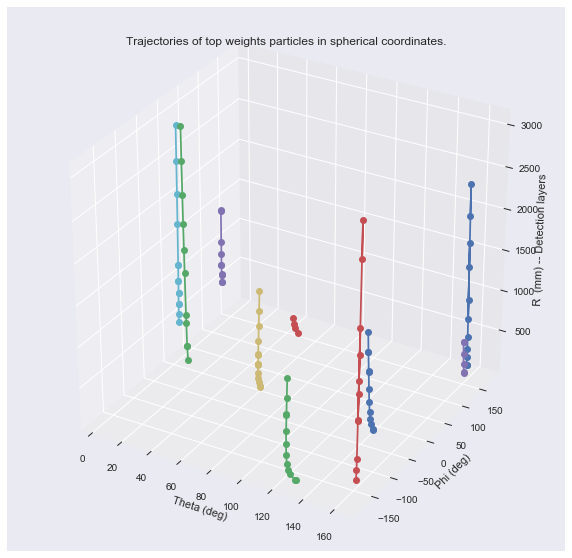

In [8]:
# Get particle id with highest weights
NUM_PARTICLES = 170
truth_dedup = truth.drop_duplicates('particle_id')
truth_sort = truth_dedup.sort_values('weight', ascending=False)
truth_head = truth_sort.iloc[NUM_PARTICLES: 180] #truth_sort.head(NUM_PARTICLES)

# Get points where the same particle intersected subsequent layers of the observation material
p_traj_list = []
for _, tr in truth_head.iterrows():
    p_traj = truth[truth.particle_id == tr.particle_id][['tx', 'ty', 'tz']]
    # Add initial position.
    #p_traj = (p_traj
    #          .append({'tx': particle.vx, 'ty': particle.vy, 'tz': particle.vz}, ignore_index=True)
    #          .sort_values(by='tz'))
    p_traj_list.append(p_traj)
    
print("p_traj_list" "\n", p_traj_list)
    
# Convert to spherical coordinate.
rtp_list = []
for p_traj in p_traj_list:
    xyz = p_traj.loc[:, ['tx', 'ty', 'tz']].values.transpose()
    rtp = cart2spherical(xyz).transpose()
    rtp_df = pd.DataFrame(rtp, columns=('r', 'theta', 'phi'))
    rtp_list.append(rtp_df)
    
print("rtp_list" "\n", rtp_list)

# Plot with Cartesian coordinates.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for p_traj in p_traj_list:
    ax.plot(
        xs=p_traj.tx,
        ys=p_traj.ty,
        zs=p_traj.tz,
        marker='o')
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm) -- Detection layers')
plt.title('Trajectories of top weights particles in Cartesian coordinates.')

# Plot with spherical coordinates.
fig2 = plt.figure(figsize=(10, 10))
ax = fig2.add_subplot(111, projection='3d')
for rtp_df in rtp_list:
    ax.plot(
        xs=rtp_df.theta,
        ys=rtp_df.phi,
        zs=rtp_df.r,
        marker='o')
ax.set_xlabel('Theta (deg)')
ax.set_ylabel('Phi (deg)')
ax.set_zlabel('R  (mm) -- Detection layers')
plt.title('Trajectories of top weights particles in spherical coordinates.')
plt.show()



# for angle in range(0, 360):
#     fig2 = plt.figure(figsize=(10, 10))
#     ax = fig2.add_subplot(111, projection='3d')
#     for rtp_df in rtp_list:
#         ax.plot(
#             xs=rtp_df.theta,
#             ys=rtp_df.phi,
#             zs=rtp_df.r,
#             marker='o')
#     ax.set_xlabel('Theta (deg)')
#     ax.set_ylabel('Phi (deg)')
#     ax.set_zlabel('R  (mm) -- Detection layers')
#     plt.title('Trajectories of top weights particles in spherical coordinates.')
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)
#     plt.show()